# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
cities

['vaini',
 'tiksi',
 'illoqqortoormiut',
 'ancud',
 'araouane',
 'new norfolk',
 'mataura',
 'jamestown',
 'tuktoyaktuk',
 'tsihombe',
 'rikitea',
 'puerto ayora',
 'nikolskoye',
 'cherskiy',
 'tazovskiy',
 'chuy',
 'coahuayana',
 'ahuimanu',
 'mar del plata',
 'tura',
 'sorvag',
 'jalu',
 'pacific grove',
 'wilmington',
 'yellowknife',
 'axim',
 'te anau',
 'bengkulu',
 'thompson',
 'nizhneyansk',
 'porto santo',
 'sebastian',
 'east london',
 'kerman',
 'kapaa',
 'vila franca do campo',
 'guaruja',
 'metu',
 'hobyo',
 'maykor',
 'belushya guba',
 'avarua',
 'kavaratti',
 'hofn',
 'port blair',
 'grindavik',
 'avera',
 'atuona',
 'ushuaia',
 'sapernoye',
 'sept-iles',
 'neiafu',
 'oleksandrivka',
 'itarema',
 'san lazaro',
 'half moon bay',
 'rio casca',
 'busselton',
 'amderma',
 'luanda',
 'sao filipe',
 'takoradi',
 'orel-izumrud',
 'broome',
 'ye',
 'hami',
 'castro',
 'port alfred',
 'kaiyuan',
 'shimoda',
 'twentynine palms',
 'presidencia roque saenz pena',
 'katsuura',
 'virgi

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# set units for response
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | gold coast
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | morales
Processing Record 6 of Set 1 | baykit
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | dong hoi
Processing Record 11 of Set 1 | comodoro rivadavia
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | witrivier
City not found. Skipping...
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | surgut
Processing Record 20 of Set 1 | qaqortoq
Processing Recor

Processing Record 34 of Set 4 | sao gabriel da cachoeira
Processing Record 35 of Set 4 | bata
Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | takoradi
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | paradwip
City not found. Skipping...
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | puerto carreno
Processing Record 42 of Set 4 | yirol
City not found. Skipping...
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | maniitsoq
Processing Record 45 of Set 4 | birjand
Processing Record 46 of Set 4 | okha
Processing Record 47 of Set 4 | marrakesh
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | acuna
City not found. Skipping...
Processing Record 0 of Set 5 | gryfino
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | zaterechnyy
Processing Record 5 of Set 5 | bubaque


Processing Record 20 of Set 8 | tlaxiaco
City not found. Skipping...
Processing Record 21 of Set 8 | thompson
Processing Record 22 of Set 8 | victoria
Processing Record 23 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 25 of Set 8 | kavieng
Processing Record 26 of Set 8 | warah
Processing Record 27 of Set 8 | bereda
Processing Record 28 of Set 8 | biak
Processing Record 29 of Set 8 | lima
Processing Record 30 of Set 8 | taksimo
Processing Record 31 of Set 8 | umm durman
City not found. Skipping...
Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | concordia
Processing Record 34 of Set 8 | clarence town
Processing Record 35 of Set 8 | martapura
Processing Record 36 of Set 8 | hofn
Processing Record 37 of Set 8 | mangan
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | mount pleasant
Processing Record 40 of Set 8 | okitipupa
Processing Record 41 of Set 8 | l

City not found. Skipping...
Processing Record 9 of Set 12 | hit
Processing Record 10 of Set 12 | brae
Processing Record 11 of Set 12 | ende
Processing Record 12 of Set 12 | nuuk
Processing Record 13 of Set 12 | athabasca
Processing Record 14 of Set 12 | zhuhai
Processing Record 15 of Set 12 | roald
Processing Record 16 of Set 12 | sao miguel do araguaia
Processing Record 17 of Set 12 | jining
Processing Record 18 of Set 12 | shieli
Processing Record 19 of Set 12 | arlit
Processing Record 20 of Set 12 | ketchikan
Processing Record 21 of Set 12 | inhambane
Processing Record 22 of Set 12 | mercedes
Processing Record 23 of Set 12 | wajir
Processing Record 24 of Set 12 | maraa
Processing Record 25 of Set 12 | grand centre
City not found. Skipping...
Processing Record 26 of Set 12 | bridlington
Processing Record 27 of Set 12 | sao sebastiao
Processing Record 28 of Set 12 | los llanos de aridane
Processing Record 29 of Set 12 | gushikawa
Processing Record 30 of Set 12 | victor harbor
Processi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,28.09,78,20,3.60,TO,1674678276
1,gold coast,-28.0000,153.4333,23.47,97,53,1.54,AU,1674678044
2,eyl,7.9803,49.8164,23.49,70,8,7.65,SO,1674678277
3,tuktoyaktuk,69.4541,-133.0374,-23.00,84,75,4.63,CA,1674678277
4,morales,2.7570,-76.6172,22.44,66,99,1.99,CO,1674678277


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,78,20,3.60,TO,1674678276
1,gold coast,-28.0000,153.4333,23.47,97,53,1.54,AU,1674678044
2,eyl,7.9803,49.8164,23.49,70,8,7.65,SO,1674678277
3,tuktoyaktuk,69.4541,-133.0374,-23.00,84,75,4.63,CA,1674678277
4,morales,2.7570,-76.6172,22.44,66,99,1.99,CO,1674678277


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

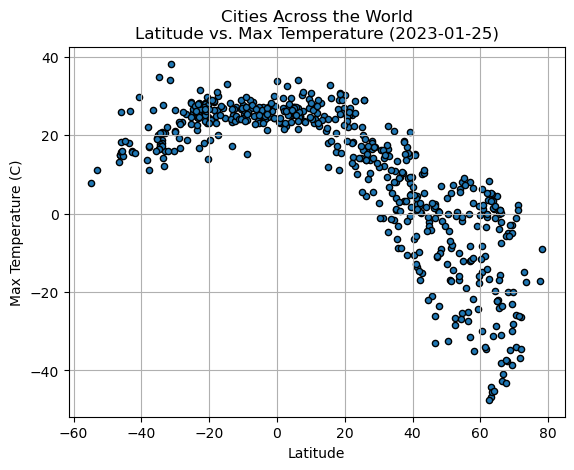

In [22]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter(x="Lat", y="Max Temp", 
                          title="Cities Across the World\nLatitude vs. Max Temperature (2023-01-25)",
                         xlabel="Latitude",
                         ylabel="Max Temperature (C)",
                         grid=True,
                         edgecolors='k')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

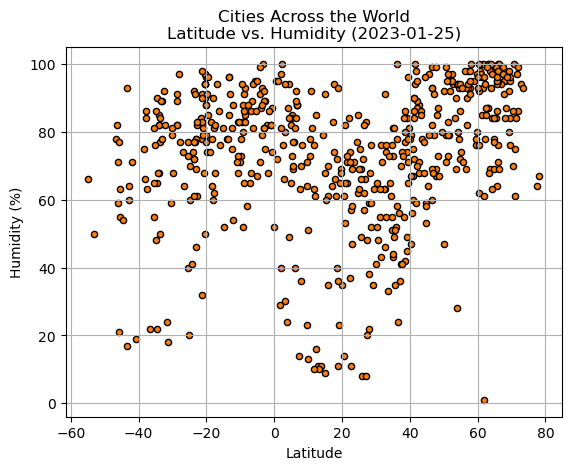

In [23]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot.scatter(x="Lat", y="Humidity", 
                          title="Cities Across the World\nLatitude vs. Humidity (2023-01-25)",
                         xlabel="Latitude",
                         ylabel="Humidity (%)",
                         grid=True,
                          color='tab:orange',
                         edgecolors='k')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

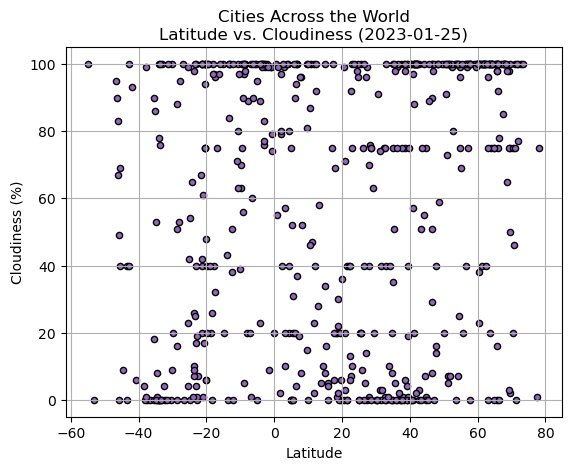

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter(x="Lat", y="Cloudiness", 
                          title="Cities Across the World\nLatitude vs. Cloudiness (2023-01-25)",
                         xlabel="Latitude",
                         ylabel="Cloudiness (%)",
                         grid=True,
                          color='tab:purple',
                         edgecolors='k')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

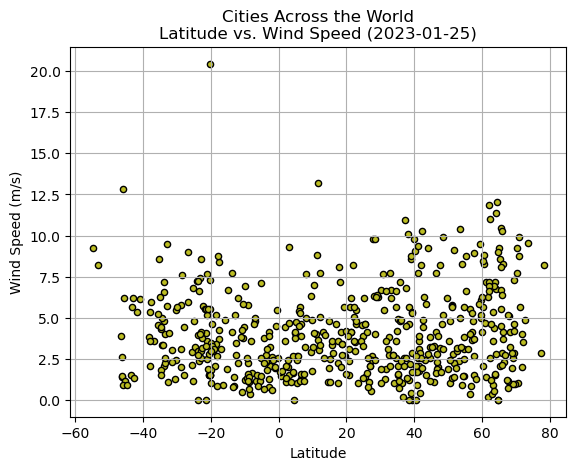

In [25]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot.scatter(x="Lat", y="Wind Speed", 
                          title="Cities Across the World\nLatitude vs. Wind Speed (2023-01-25)",
                         xlabel="Latitude",
                         ylabel="Wind Speed (m/s)",
                         grid=True,
                          color='tab:olive',
                         edgecolors='k')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

def lin_regress_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, linewidths=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0.05, 0.05),xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,eyl,7.9803,49.8164,23.49,70,8,7.65,SO,1674678277
3,tuktoyaktuk,69.4541,-133.0374,-23.00,84,75,4.63,CA,1674678277
4,morales,2.7570,-76.6172,22.44,66,99,1.99,CO,1674678277
5,baykit,61.6700,96.3700,-34.64,100,100,0.18,RU,1674678278
6,fairbanks,64.8378,-147.7164,-22.17,78,75,0.00,US,1674678039


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,78,20,3.60,TO,1674678276
1,gold coast,-28.0000,153.4333,23.47,97,53,1.54,AU,1674678044
8,avarua,-21.2078,-159.7750,28.03,83,40,5.14,CK,1674678279
10,comodoro rivadavia,-45.8667,-67.5000,25.92,21,0,12.86,AR,1674678280
11,hithadhoo,-0.6000,73.0833,27.54,74,79,5.47,MV,1674678281


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8223578275051119


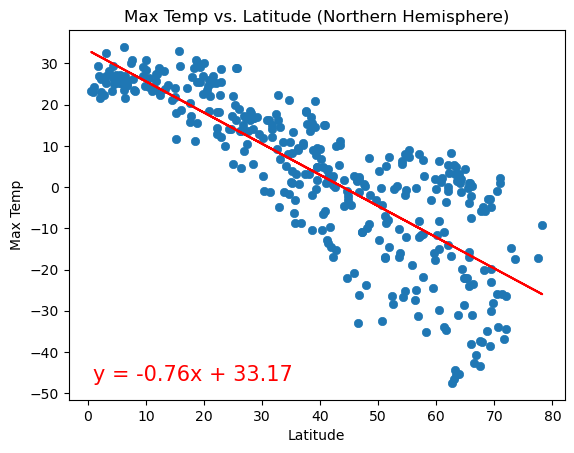

In [63]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]
x_label_lat = "Latitude"
y_label_temp = "Max Temp"
title_temp_north = "Max Temp vs. Latitude (Northern Hemisphere)"

lin_regress_plot(north_lat, north_temp, x_label_lat, y_label_temp, title_temp_north)

The r-value is: 0.5621865127982694


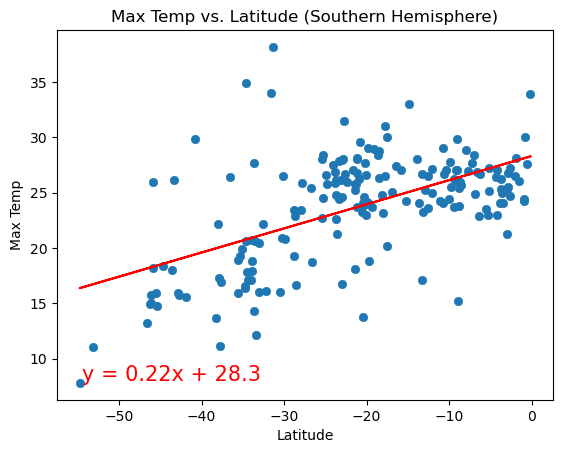

In [64]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]
# x_label_lat = "Latitude"
# y_label_temp = "Max Temp"
title_temp_south = "Max Temp vs. Latitude (Southern Hemisphere)"

lin_regress_plot(south_lat, south_temp, x_label_lat, y_label_temp, title_temp_south)

**Discussion about the linear relationship:**

These regression plots show the relationship between the maximum temperature for the current day and the latitude of all of the locations in the northern hemisphere dataframe (latitude >= 0) and southern hemisphere dataframe (latitude <= 0). From the calculation of the linear regression and r value of said regression we can say with a good amount of confidence (r value = -0.82) that there is a negative linear trend when it comes to maximum daily temperatures and latitude in the northern hemisphere. Maximum temperatures decline as latitude coordinates increase, meaning the farther you get from the equator the colder it becomes. In the southern hemisphere, there is also a linear trend, but with less confidence (r value = 0.56) than in the northern hemisphere and is positive instead of negative. Maximum temperatures increase as you decrease the latitude coordinates, meaning it closer you get to the equator the warmer it becomes.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.435063084156153


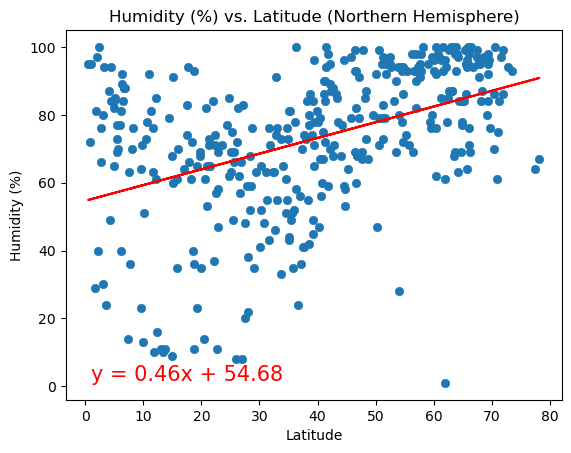

In [65]:
# Northern Hemisphere
# north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]
# x_label_lat = "Latitude"
y_label_hum = "Humidity (%)"
title_hum_north = "Humidity (%) vs. Latitude (Northern Hemisphere)"

lin_regress_plot(north_lat, north_hum, x_label_lat, y_label_hum, title_hum_north)

The r-value is: 0.36687273818366617


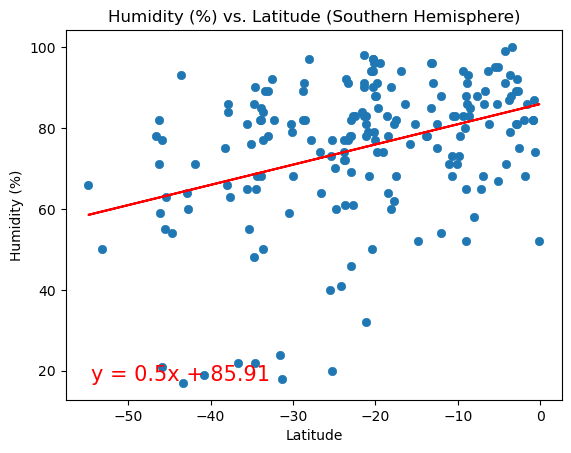

In [66]:
# Southern Hemisphere
# south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]
# x_label_lat = "Latitude"
# y_label_hum = "Humidity (%)"
title_hum_south = "Humidity (%) vs. Latitude (Southern Hemisphere)"

lin_regress_plot(south_lat, south_hum, x_label_lat, y_label_hum, title_hum_south)

**Discussion about the linear relationship:**

These regression plots show the relationship between the percentage of humidity for the current day and the latitude of all of the locations in the northern hemisphere dataframe (latitude >= 0) and southern hemisphere dataframe (latitude <= 0). From the calculation of the linear regression and r value of said regression we can say with a low confidence (r values = 0.43, 0.36) that there is a positive linear trend when it comes to daily humidity percentage and latitude in the northern and southern hemispheres. Humidity levels increase as latitude coordinates increase in both hemispheres, but this means different things for each. In the north, as you move away from the equator, it tends to get more humid. In the south, as you move towards the equator it tends to get more humid. Regardless, becuase the r values of both regressions are fairly low I'd want to see more data from more times of the year to increase confidence in what we are seeing here. Seasonality might affect the humidity measurements.

### Cloudiness vs. Latitude Linear Regression Plot

The line equation is: y = 0.6x + 35.21
The r-value is: 0.30027880864709217


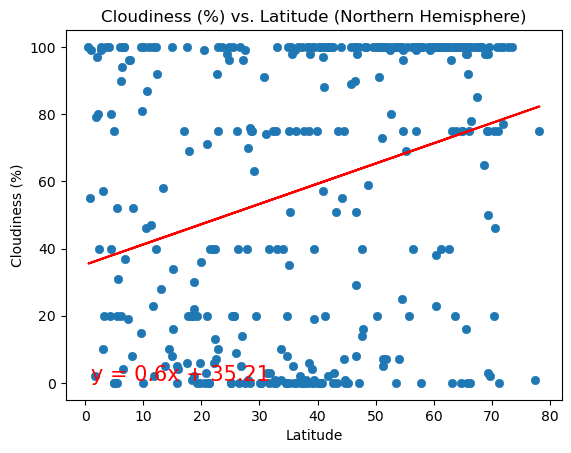

In [56]:
# Northern Hemisphere
# north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]
# x_label_lat = "Latitude"
y_label_cloud = "Cloudiness (%)"
title_cloud_north = "Cloudiness (%) vs. Latitude (Northern Hemisphere)"

lin_regress_plot(north_lat, north_cloud, x_label_lat, y_label_cloud, title_cloud_north)

The line equation is: y = 1.09x + 79.47
The r-value is: 0.34547736411023244


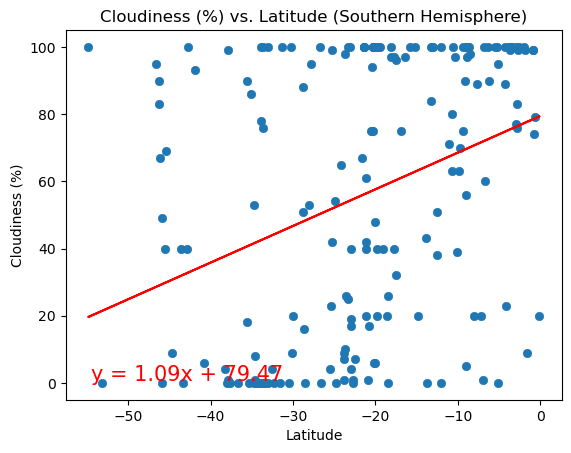

In [57]:
# Southern Hemisphere
# south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]
# x_label_lat = "Latitude"
# y_label_cloud = "Cloudiness (%)"
title_cloud_south = "Cloudiness (%) vs. Latitude (Southern Hemisphere)"

lin_regress_plot(south_lat, south_cloud, x_label_lat, y_label_cloud, title_cloud_south)

**Discussion about the linear relationship:** 

These regression plots show the relationship between the percentage of cloudiness for the current day and the latitude of all of the locations in the northern hemisphere dataframe (latitude >= 0) and southern hemisphere dataframe (latitude <= 0). From the calculation of the linear regression and r value of said regression we can say there is a very low confidence (r values = 0.30, 0.34) that there is a positive linear trend when it comes to cloudiness and latitude in the northern and southern hemispheres. The visual distribution of scatter points also backs this up and I would venture to say there is little to no linear relationship when it comes to cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The line equation is: y = 0.02x + 3.22
The r-value is: 0.17310137124770578


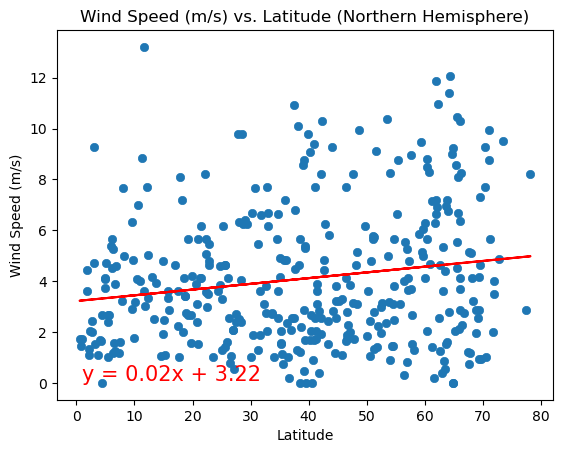

In [58]:
# Northern Hemisphere
# north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]
# x_label_lat = "Latitude"
y_label_wind = "Wind Speed (m/s)"
title_wind_north = "Wind Speed (m/s) vs. Latitude (Northern Hemisphere)"

lin_regress_plot(north_lat, north_wind, x_label_lat, y_label_wind, title_wind_north)

The line equation is: y = -0.05x + 2.68
The r-value is: -0.24512478462758447


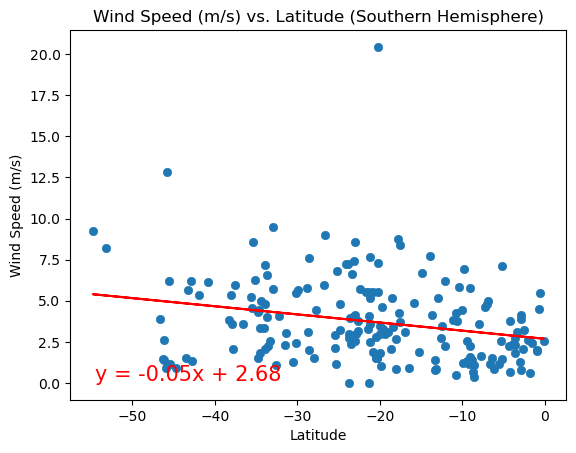

In [59]:
# Southern Hemisphere
# south_lat = southern_hemi_df["Lat"]
south_wind = southern_hemi_df["Wind Speed"]
# x_label_lat = "Latitude"
# y_label_wind = "Wind Speed (m/s)"
title_wind_south = "Wind Speed (m/s) vs. Latitude (Southern Hemisphere)"

lin_regress_plot(south_lat, south_wind, x_label_lat, y_label_wind, title_wind_south)

**Discussion about the linear relationship:** 

These regression plots show the relationship between the wind speed for the current day and the latitude of all of the locations in the northern hemisphere dataframe (latitude >= 0) and southern hemisphere dataframe (latitude <= 0). From the calculation of the linear regression and r value of said regression we can say there is a extremely low confidence (r values = 0.17, -0.24) that there is any linear trends when it comes to wind speed and latitude. 